In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score

## Dropping Other charges as they equal to Total charge

In [2]:
telecom = pd.read_csv("telecommunications_churn.csv")
drop = ['day_charge','evening_charge','night_charge','international_charge']
telecom = telecom.drop(columns=drop)

telecom

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,126,83,6,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,55,123,4,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,58,91,6,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,84,137,10,57.53,0


<AxesSubplot:>

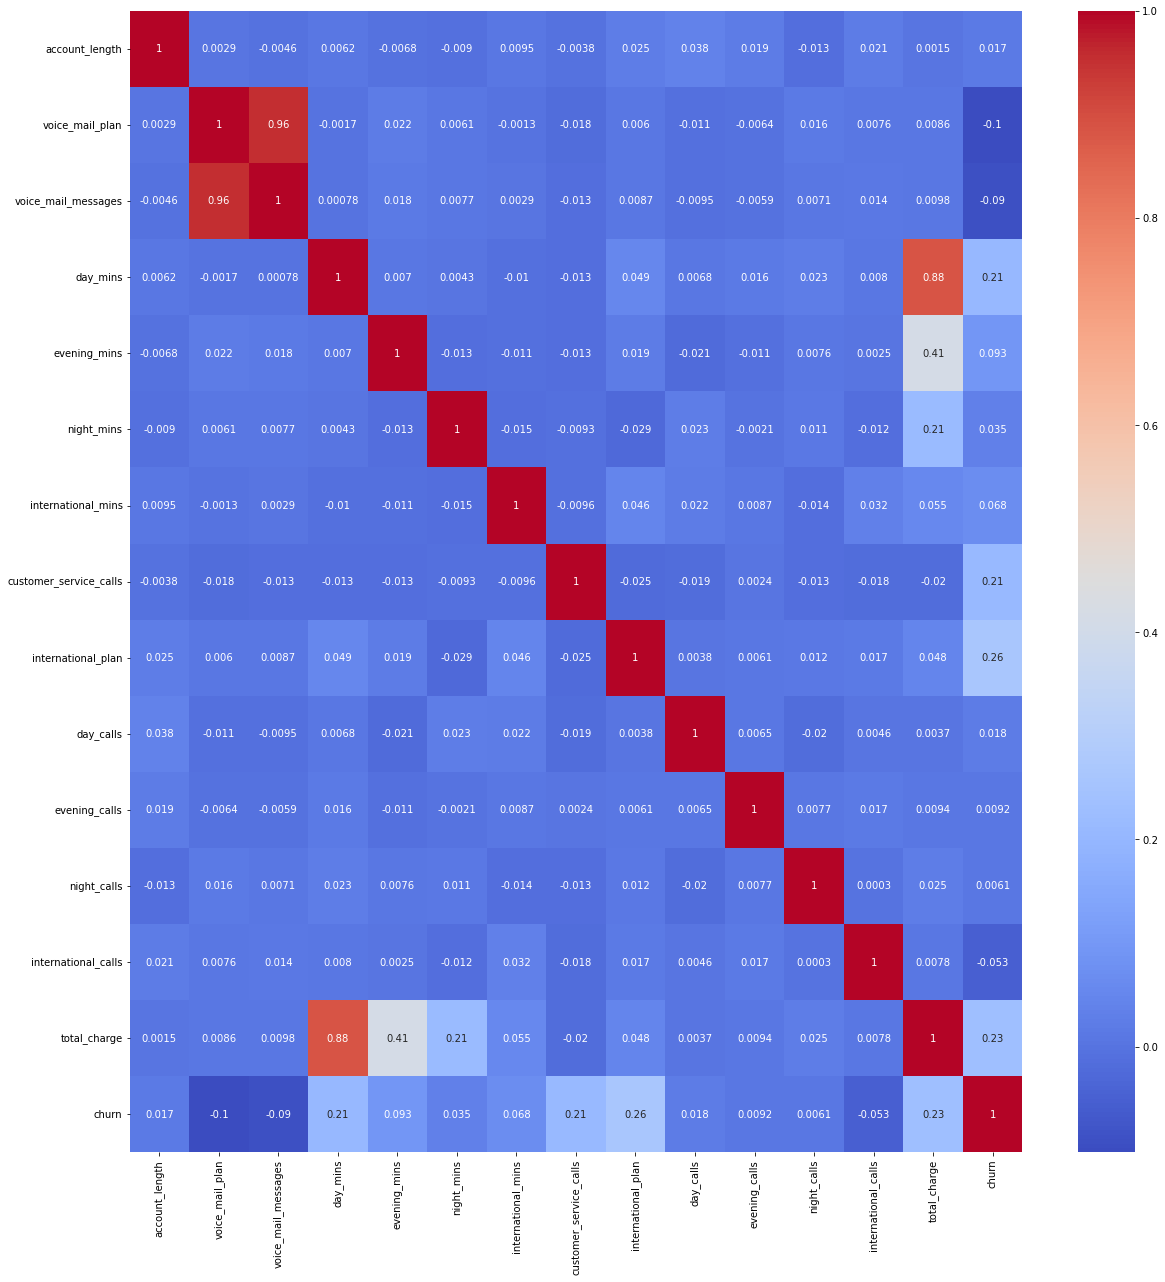

In [3]:
plt.figure(figsize=(20,21))
sns.heatmap(telecom.corr(),annot=True,cmap='coolwarm')

# 

### 

##### 

### checking correlation dependency among independant variables

In [4]:
x = telecom[['day_mins','evening_mins','night_mins','international_mins']]
y = telecom.total_charge

In [5]:
linear = LinearRegression()
linear.fit(x,y)

LinearRegression()

In [6]:
linear.coef_

array([0.16999842, 0.0850002 , 0.04500073, 0.26996442])

In [7]:
linear.score(x,y)

0.9999997074799899

In [8]:
from sklearn.metrics import mean_squared_error
pred = linear.predict(x)
mean_squared_error(y, pred)

3.225453999318252e-05

# 

### 

#### Original Imbalanced data Modelling 

#### Train test split

In [9]:
X = telecom.drop("churn", axis=1)
y = telecom.churn

In [10]:
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42, stratify=y)

In [12]:
train_y.value_counts()

0    2280
1     386
Name: churn, dtype: int64

In [13]:
train_x

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge
3286,106,1,30,220.1,222.2,158.4,13.1,0,0,105,109,96,8,66.98
86,94,0,0,157.9,155.0,189.6,8.0,4,0,105,101,84,5,50.71
1349,71,1,22,141.4,163.0,220.0,5.6,2,0,107,105,99,3,49.31
1649,130,0,0,68.4,193.3,171.5,10.4,0,0,86,110,139,4,38.59
3000,87,0,0,223.2,127.5,289.3,14.5,3,0,109,86,83,4,65.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,116,1,12,221.0,151.0,179.0,9.0,2,0,108,118,80,6,60.90
2165,160,0,0,171.2,243.5,178.2,13.0,2,0,103,121,92,3,61.33
2988,105,0,0,259.3,175.2,222.4,12.0,3,0,96,97,36,5,72.22
179,70,0,0,232.1,292.3,201.2,0.0,3,0,122,112,112,0,73.36


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
strain_x= scaler.fit_transform(train_x)
stest_x= scaler.transform(test_x)


In [15]:
imballogit = LogisticRegression()
imballogit.fit(strain_x, train_y)

LogisticRegression()

In [16]:
imballogit.score(strain_x, train_y)

0.8615903975993998

In [17]:
imballogit.score(stest_x, test_y)

0.8590704647676162

In [18]:
pred2 = imballogit.predict(strain_x)
imballogitpred_test2 = imballogit.predict(stest_x)

print(confusion_matrix(test_y, imballogitpred_test2))

print(classification_report(test_y, imballogitpred_test2))

[[549  21]
 [ 73  24]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



In [19]:
model1 = DecisionTreeClassifier()
model1.fit(strain_x,train_y) 

DecisionTreeClassifier()

In [20]:
model1.score(strain_x,train_y)

1.0

In [21]:
model1.score(stest_x, test_y)

0.9535232383808095

In [22]:
pred2 = model1.predict(strain_x)
DTpred_test2 = model1.predict(stest_x)

print(confusion_matrix(test_y, DTpred_test2))

print(classification_report(test_y, DTpred_test2))

[[560  10]
 [ 21  76]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.88      0.78      0.83        97

    accuracy                           0.95       667
   macro avg       0.92      0.88      0.90       667
weighted avg       0.95      0.95      0.95       667



In [23]:
### cross validation for DT

k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore_imb_dt_train = cross_val_score(estimator=model1, X=strain_x, y=train_y, cv=k_fold)

cvscore_imb_dt_train.mean(), cvscore_imb_dt_train.std()

(0.9501168651966996, 0.008204972036912674)

In [24]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore_imb_dt_test = cross_val_score(estimator=model1, X=stest_x, y=test_y, cv=k_fold)

cvscore_imb_dt_test.mean(), cvscore_imb_dt_test.std()

(0.9400045228403435, 0.024253148849274833)

# 

## 

### 

### Balancing Dataset

#### Testing for balanced data 

In [25]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)


In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
train_x1, train_y1 = sm.fit_resample(train_x, train_y)

In [27]:
train_y.value_counts()

0    2280
1     386
Name: churn, dtype: int64

In [28]:
train_y1.value_counts()

0    2280
1    2280
Name: churn, dtype: int64

In [29]:
test_y.value_counts()

0    570
1     97
Name: churn, dtype: int64

In [30]:
train_x1

array([[ 0.12573683,  1.62544655,  1.60682236, ..., -0.19570209,
         1.43649992,  0.726949  ],
       [-0.17530888, -0.61521555, -0.58879119, ..., -0.80855461,
         0.20349645, -0.83310088],
       [-0.75231315,  1.62544655,  1.02132541, ..., -0.04248896,
        -0.61850587, -0.96733996],
       ...,
       [-0.08632403, -0.61521555, -0.58879119, ...,  0.25389644,
        -1.02950703, -0.6879208 ],
       [ 0.38163244, -0.61521555, -0.58879119, ..., -0.85802617,
         0.82643422,  1.99303189],
       [ 0.88514554, -0.61521555, -0.58879119, ..., -1.65426676,
         1.08584417, -1.71010862]])

In [31]:
train_x1.shape, strain_x.shape

((4560, 14), (2666, 14))

In [32]:
train_x1_1 = pd.DataFrame(data=train_x1 , columns=X.columns)

train_x1_1.duplicated().sum()

0

#### New training dataset has been created using smote with no duplicates in it so chances of overfitting is less

# 

In [33]:
logit = LogisticRegression()
logit.fit(train_x1, train_y1)

LogisticRegression()

In [34]:
logit.score(train_x1, train_y1)

0.780921052631579

In [35]:
logit.score(test_x, test_y)

0.7586206896551724

In [36]:
pred2 = logit.predict(train_x1)
bal_pred_test = logit.predict(test_x)

print(classification_report(test_y, bal_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.34      0.72      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.74      0.65       667
weighted avg       0.85      0.76      0.79       667



In [37]:
confusion_matrix(test_y, bal_pred_test)

array([[436, 134],
       [ 27,  70]], dtype=int64)

In [38]:
model = DecisionTreeClassifier()
model.fit(train_x1, train_y1) 

DecisionTreeClassifier()

In [39]:
model.score(train_x1, train_y1)

1.0

In [40]:
model.score(test_x, test_y)

0.9190404797601199

In [41]:
pred2 = model.predict(train_x1)
bal_dtpred_test2 = model.predict(test_x)

print(confusion_matrix(test_y, bal_dtpred_test2))

print(classification_report(test_y, bal_dtpred_test2))

[[537  33]
 [ 21  76]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.70      0.78      0.74        97

    accuracy                           0.92       667
   macro avg       0.83      0.86      0.84       667
weighted avg       0.92      0.92      0.92       667



### cross validation for DT

In [42]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore_bal_dt_train = cross_val_score(estimator=model1, X=train_x1, y=train_y1, cv=k_fold)

cvscore_bal_dt_train.mean(), cvscore_bal_dt_train.std()

(0.9528508771929826, 0.00850752839529423)

In [43]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore_bal_dt_test = cross_val_score(estimator=model1, X=test_x, y=test_y, cv=k_fold)

cvscore_bal_dt_test.mean(), cvscore_bal_dt_test.std()

(0.9384893713251922, 0.021779483965497053)

# 

## 

### 

### Xgboost on imbalanced Data

### Hyper parameter tuning

In [48]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 17, 20],
 "min_child_weight" : [0.25, 0.05, 0.5, 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [50, 100, 200, 150, 250, 300]  
}

xgb_clf=XGBClassifier()

random_search=RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=5, scoring='roc_auc',
                                 n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search.fit(strain_x,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12, 15,
                                                      17, 20],
                                        'min_child_weight': [0.25, 0.05, 0.5, 1,
                                                             3, 5, 7],
                                        'n_estimators': [50, 100, 200, 150, 250,
                                                         300]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [49]:
random_search.best_params_

{'n_estimators': 200,
 'min_child_weight': 0.25,
 'max_depth': 10,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [86]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0,
              min_child_weight=0.5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [59]:
xgb_clf_imb = XGBClassifier(n_estimators=200, max_depth=2, min_child_weight=0.25,learning_rate= 0.25)
xgb_clf_imb.fit(strain_x,train_y)
predictions = xgb_clf_imb.predict(stest_x)

print("Confusion Matrix:")
print(confusion_matrix(test_y, predictions))

print("Classification Report")
print(classification_report(test_y, predictions))


Confusion Matrix:
[[569   1]
 [ 22  75]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       0.99      0.77      0.87        97

    accuracy                           0.97       667
   macro avg       0.97      0.89      0.92       667
weighted avg       0.97      0.97      0.96       667



In [60]:
predictions = xgb_clf_imb.predict(strain_x)

print("Confusion Matrix:")
print(confusion_matrix(train_y, predictions))

print("Classification Report")
print(classification_report(train_y, predictions))


Confusion Matrix:
[[2280    0]
 [  49  337]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2280
           1       1.00      0.87      0.93       386

    accuracy                           0.98      2666
   macro avg       0.99      0.94      0.96      2666
weighted avg       0.98      0.98      0.98      2666



### Xgboost on balanced Data

In [61]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 17, 20],
 "min_child_weight" : [0.5, 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [50, 100, 200, 150, 250, 300]  
}

xgb_clf_bal=XGBClassifier()

random_search_bal=RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=5, scoring='roc_auc',
                                 n_jobs=-1, cv=5, verbose=3, random_state=42)
random_search_bal.fit(train_x1, train_y1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12, 15,
                                                      17, 20],
                                        'min_child_weight': [0.5, 1, 3, 5, 7],
                                        'n_estimators': [50, 100, 200, 150, 250,
                                                         300]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [62]:
random_search_bal.best_params_

{'n_estimators': 250,
 'min_child_weight': 0.5,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [63]:
random_search_bal.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0,
              min_child_weight=0.5, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [67]:
xgb_clf_bal = XGBClassifier(n_estimators=250, max_depth=2, min_child_weight=0.5,learning_rate= 0.1)
xgb_clf_bal.fit(train_x1, train_y1)
predictions = xgb_clf_bal.predict(test_x)

print("Confusion Matrix:")
print(confusion_matrix(test_y, predictions))

print("Classification Report")
print(classification_report(test_y, predictions))


Confusion Matrix:
[[565   5]
 [ 25  72]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.94      0.74      0.83        97

    accuracy                           0.96       667
   macro avg       0.95      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667



In [68]:
predictions = xgb_clf_bal.predict(train_x1)

print("Confusion Matrix:")
print(confusion_matrix(train_y1, predictions))

print("Classification Report")
print(classification_report(train_y1, predictions))


Confusion Matrix:
[[2278    2]
 [ 121 2159]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2280
           1       1.00      0.95      0.97      2280

    accuracy                           0.97      4560
   macro avg       0.97      0.97      0.97      4560
weighted avg       0.97      0.97      0.97      4560



# By all the modelling we can say that balancing is not important and given training data can properly predict well for the test data.

# 

## 

In [87]:
tele = pd.read_csv("telecommunications_churn.csv")
drop = ['day_charge','evening_charge','night_charge','international_charge']
tele = tele.drop(columns=drop)

tele

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,126,83,6,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,55,123,4,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,58,91,6,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,84,137,10,57.53,0


### Feature selection on imbalanced data

In [91]:
tele.corr().sort_values("churn")["churn"]

voice_mail_plan          -0.102148
voice_mail_messages      -0.089728
international_calls      -0.052844
night_calls               0.006141
evening_calls             0.009233
account_length            0.016541
day_calls                 0.018459
night_mins                0.035493
international_mins        0.068239
evening_mins              0.092796
day_mins                  0.205151
customer_service_calls    0.208750
total_charge              0.231549
international_plan        0.259852
churn                     1.000000
Name: churn, dtype: float64

In [88]:
X = telecom.drop("churn", axis=1)
y = telecom.churn

train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42, stratify=y)

rfe = RFE(xgb_clf_imb, n_features_to_select = 6)
fit = rfe.fit(train_x, train_y)

fit.ranking_

array([8, 1, 5, 2, 3, 9, 1, 1, 1, 7, 6, 4, 1, 1])

In [92]:
data = pd.DataFrame({"Column":X.columns,"Value":fit.ranking_})

data.sort_values("Value")

,Column,Value
1,voice_mail_plan,1
6,international_mins,1
7,customer_service_calls,1
8,international_plan,1
12,international_calls,1
13,total_charge,1
3,day_mins,2
4,evening_mins,3
11,night_calls,4
2,voice_mail_messages,5


voice_mail_messages      -0.089728
international_calls      -0.052844
night_calls               0.006141
evening_calls             0.009233
account_length            0.016541
day_calls                 0.018459
night_mins                0.035493
international_mins        0.068239
evening_mins              0.092796

In [96]:
cols = data[data.Value==1].Column

In [110]:
tele_model = tele[cols]
tele_model['churn'] = tele.churn
tele_model

C:\Users\USER\AppData\Local\Temp\ipykernel_904\1872915226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tele_model['churn'] = tele.churn


,voice_mail_plan,international_mins,customer_service_calls,international_plan,international_calls,total_charge,churn
0,1,10.0,1,0,3,75.56,0
1,1,13.7,1,0,3,59.24,0
2,0,12.2,0,0,5,62.29,0
3,0,6.6,2,1,7,66.80,0
4,0,10.1,3,1,3,52.09,0
...,...,...,...,...,...,...,...
3328,1,9.9,2,0,6,60.10,0
3329,0,9.6,3,0,4,63.53,0
3330,0,14.1,2,0,6,67.74,0
3331,0,5.0,2,1,10,57.53,0


In [111]:
tele_model.to_csv('tele_model_data.csv',index=False)